# Carlos Sainz
<img src="https://www.formula1.com/content/fom-website/en/drivers/carlos-sainz/_jcr_content/image.img.1920.medium.jpg/1646818866749.jpg" width="300">

### Team: Ferrari

<img src ="https://www.formula1.com/content/fom-website/en/drivers/charles-leclerc/_jcr_content/helmet.img.png/1646824728203.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

sai_laps <- lap_data %>%
            filter(driverId == 832)

# Season Analysis

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1046,87
1045,57
990,56
1052,56
1011,53
929,29
949,29
971,12


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5289092,88.15154,1.469192


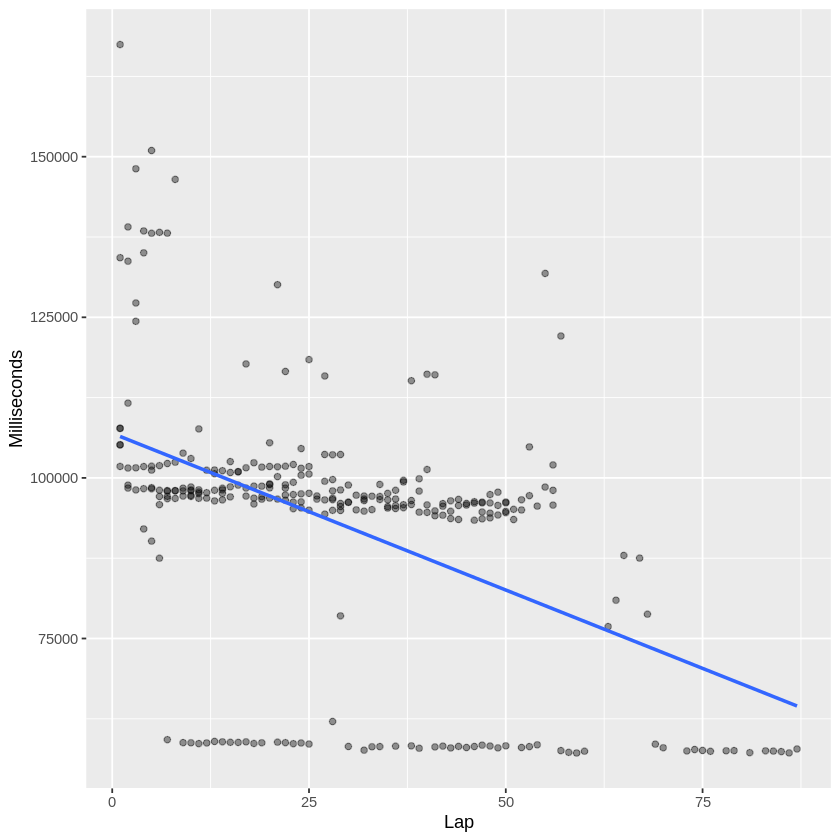

In [4]:
#1.  BAHRAIN 

cs_bahrain <- sai_laps %>%
                filter(raceId %in% bahrain_race_ID) 

cs_bahrain_clean <- cs_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
cs_bahrain_clean
cs_bahrain_clean_ID <- cs_bahrain_clean %>%
                        pull(raceId) 


### SPLITTING DATA

cs_bahrain_races <- sai_laps %>%
                    filter(raceId %in% cs_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1072,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5334622,88.91037,1.481839


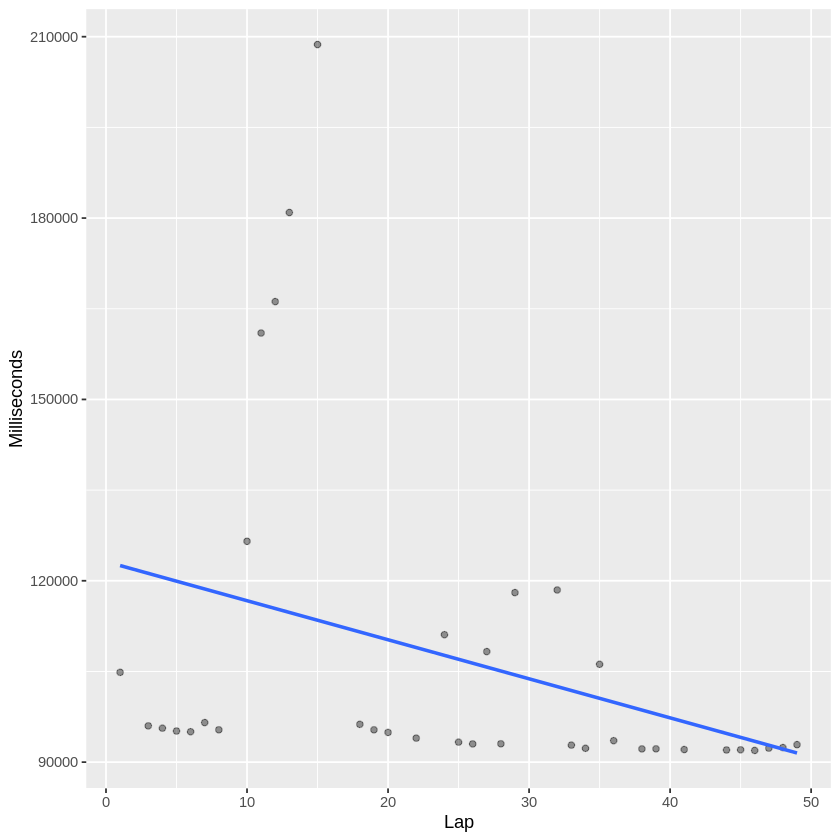

In [5]:
#2. Saudi Arabia

cs_saudi <- sai_laps %>%
                filter(raceId %in% saudi_race_ID) 

cs_saudi_clean <- cs_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_saudi_clean
cs_saudi_clean_ID <- cs_saudi_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_saudi_races <- sai_laps %>%
                    filter(raceId %in% cs_saudi_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(cs_saudi_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_sa_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
989,58
926,57
948,57
969,56
1010,9


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5448547,90.80912,1.513485


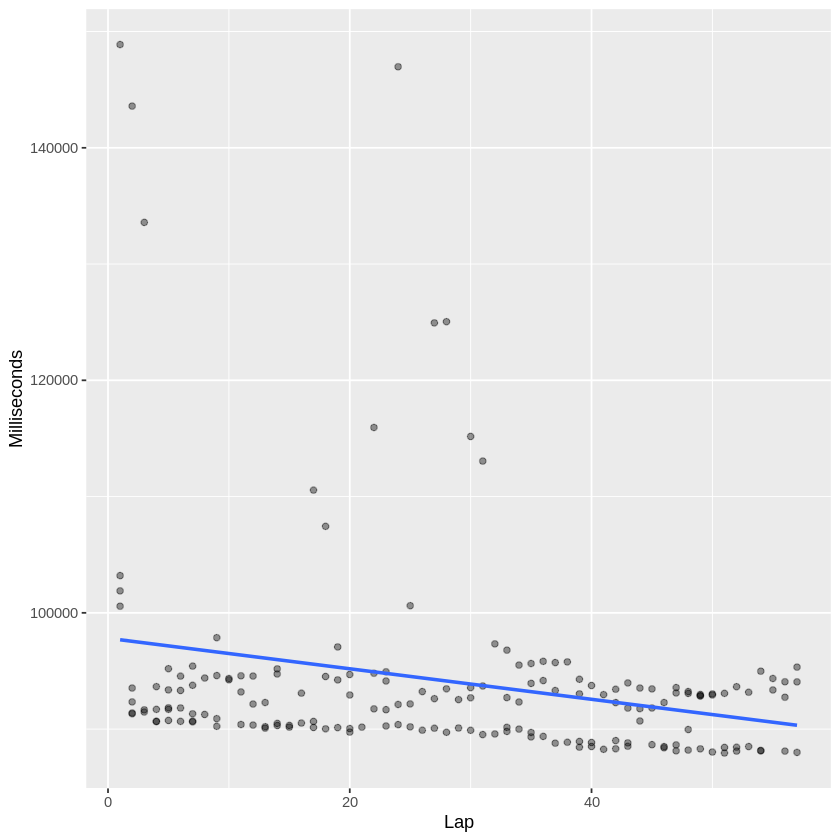

In [6]:
#3. Australia

cs_aus <- sai_laps %>%
                filter(raceId %in% aus_race_ID) 

cs_aus_clean <- cs_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_aus_clean
cs_aus_clean_ID <- cs_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_aus_races <- sai_laps %>%
                    filter(raceId %in% cs_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5603591,93.39319,1.556553


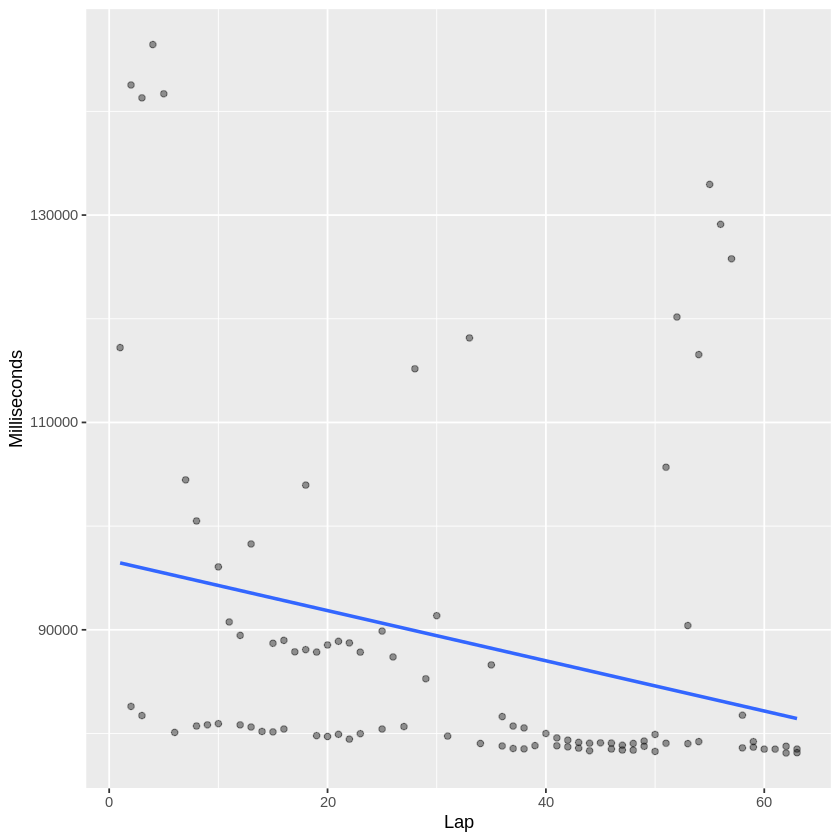

In [7]:
#4. Italy, Imola

cs_imola <- sai_laps %>%
                filter(raceId %in% imola_race_ID) 

cs_imola_clean <- cs_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_imola_clean
cs_imola_clean_ID <- cs_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_imola_races <- sai_laps %>%
                    filter(raceId %in% cs_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5750117,95.83529,1.597255


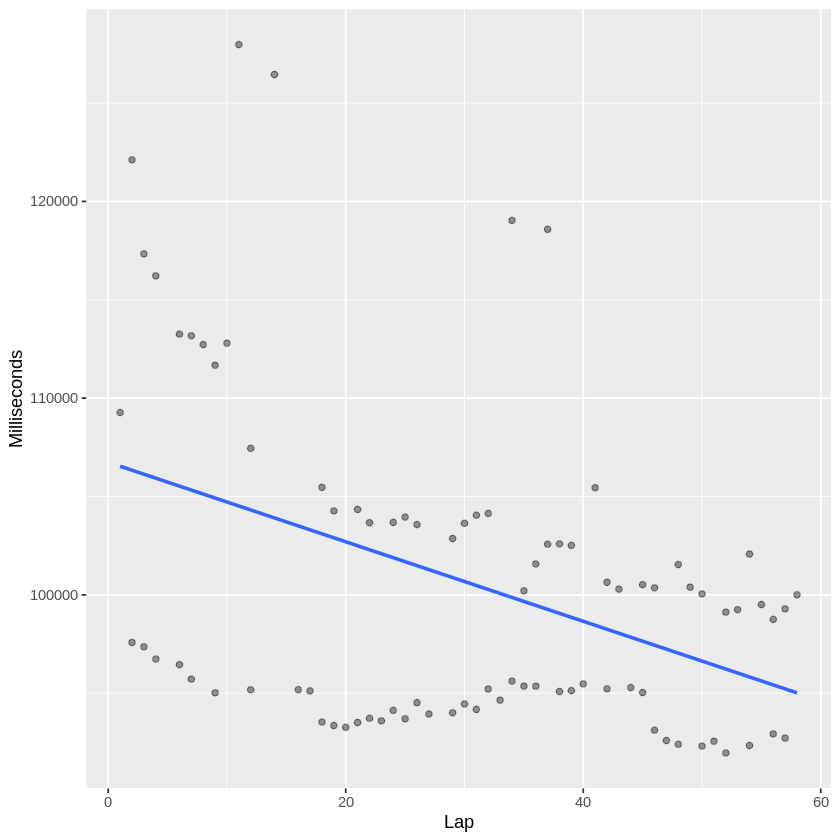

In [8]:
#5. Turkey (Replacing Miami)

cs_turkey <- sai_laps %>%
                filter(raceId %in% turkey_race_ID) 

cs_turkey_clean <- cs_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_turkey_clean
cs_turkey_clean_ID <- cs_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_turkey_races <- sai_laps %>%
                    filter(raceId %in% cs_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
952,66
1014,66
1055,66
930,65
973,65
993,65
1036,65


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5892470,98.20783,1.636797


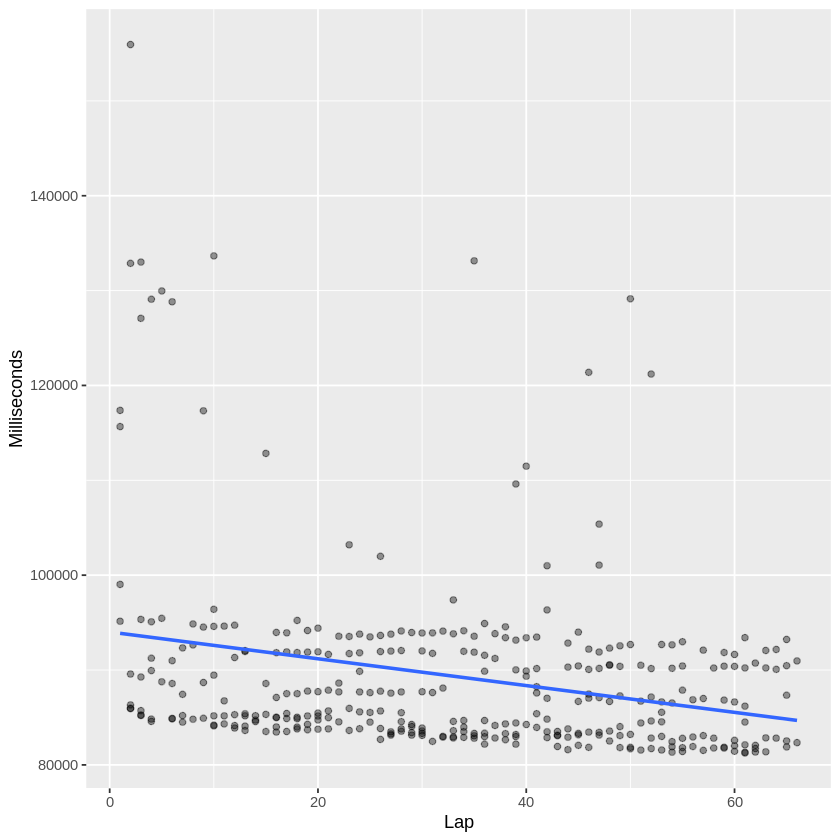

In [9]:
#6. Spain

cs_spain <- sai_laps %>%
                filter(raceId %in% spain_race_ID) 

cs_spain_clean <- cs_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_spain_clean
cs_spain_clean_ID <- cs_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_spain_races <- sai_laps %>%
                    filter(raceId %in% cs_spain_clean_ID)

formulaone_split <- initial_split(cs_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
931,78
974,78
994,78
1015,78
1056,78
953,77


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6437216,107.2869,1.788115


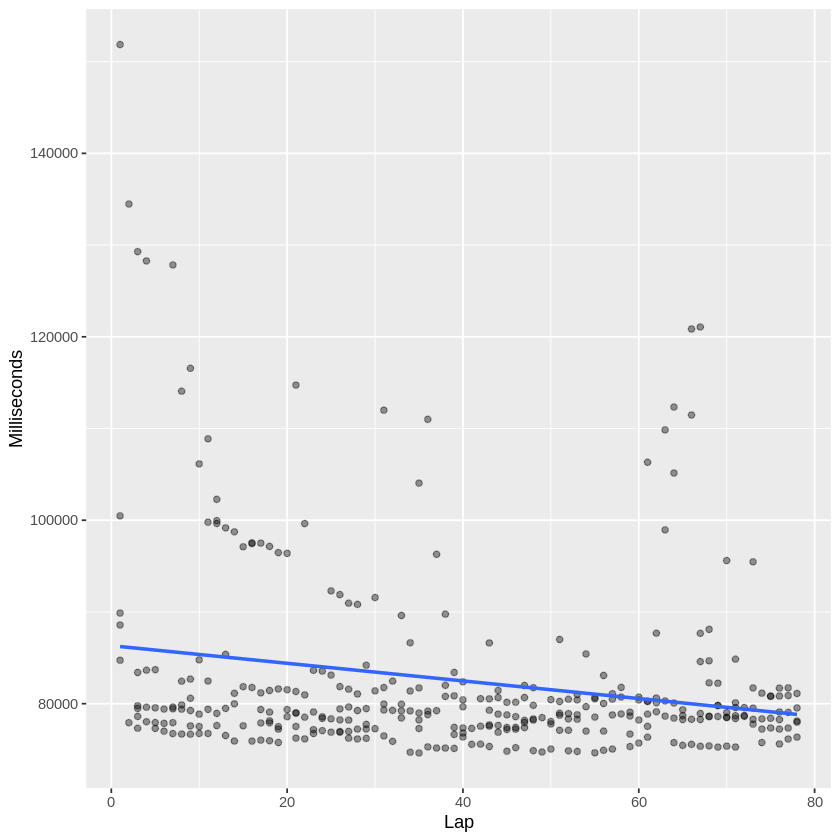

In [10]:
#7. Monaco

cs_monaco <- sai_laps %>%
                filter(raceId %in% monaco_race_ID) 

cs_monaco_clean <- cs_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_monaco_clean
cs_monaco_clean_ID <- cs_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_monaco_races <- sai_laps %>%
                    filter(raceId %in% cs_monaco_clean_ID)

formulaone_split <- initial_split(cs_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
976,51
992,51
1013,51
1057,51
955,31


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5999815,99.99692,1.666615


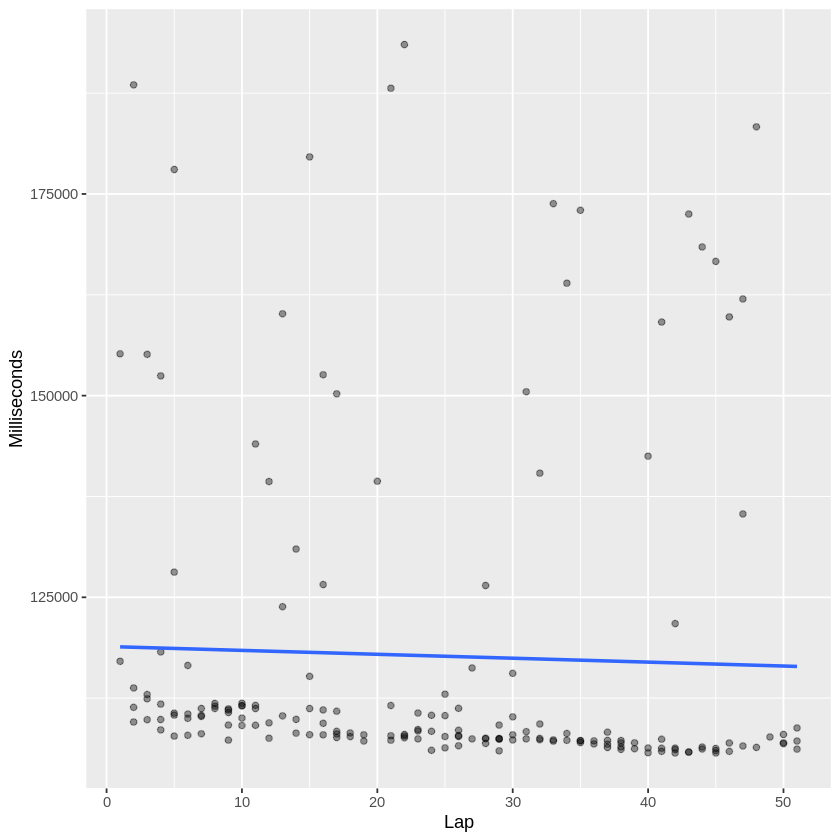

In [11]:
#8. Azerbaijan

cs_azerbaijan <- sai_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

cs_azerbaijan_clean <- cs_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_azerbaijan_clean
cs_azerbaijan_clean_ID <- cs_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_azerbaijan_races <- sai_laps %>%
                    filter(raceId %in% cs_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(cs_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
932,69
954,69
1016,69
995,67


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5555597,92.59328,1.543221


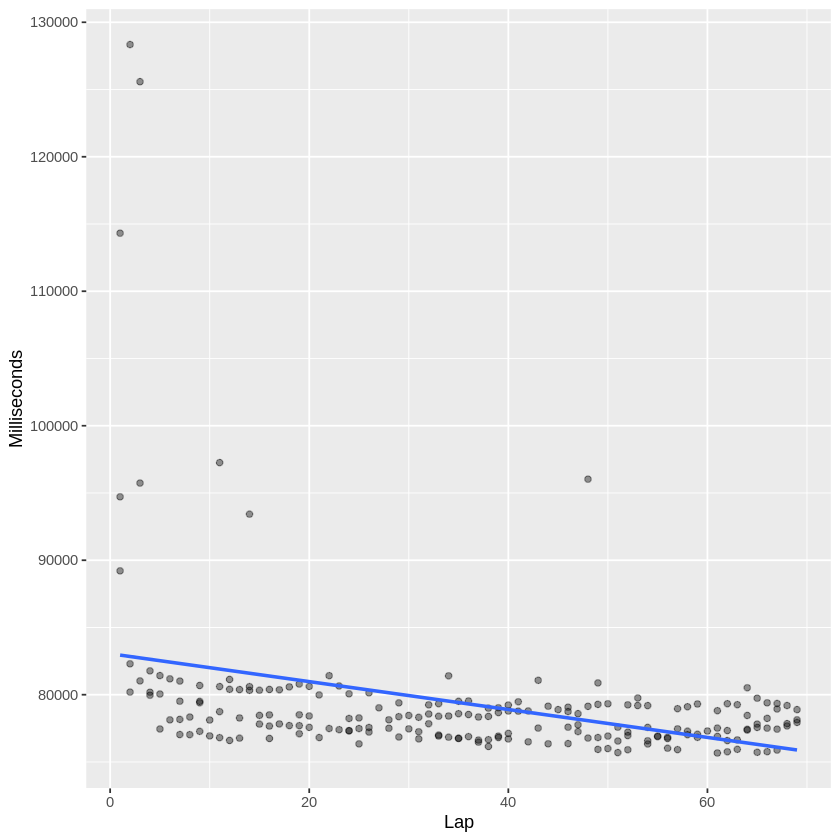

In [12]:
#9. Canada

cs_canada <- sai_laps %>%
                filter(raceId %in% canada_race_ID) 

cs_canada_clean <- cs_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_canada_clean
cs_canada_clean_ID <- cs_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_canada_races <- sai_laps %>%
                    filter(raceId %in% cs_canada_clean_ID)

formulaone_split <- initial_split(cs_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5188792,86.47987,1.441331


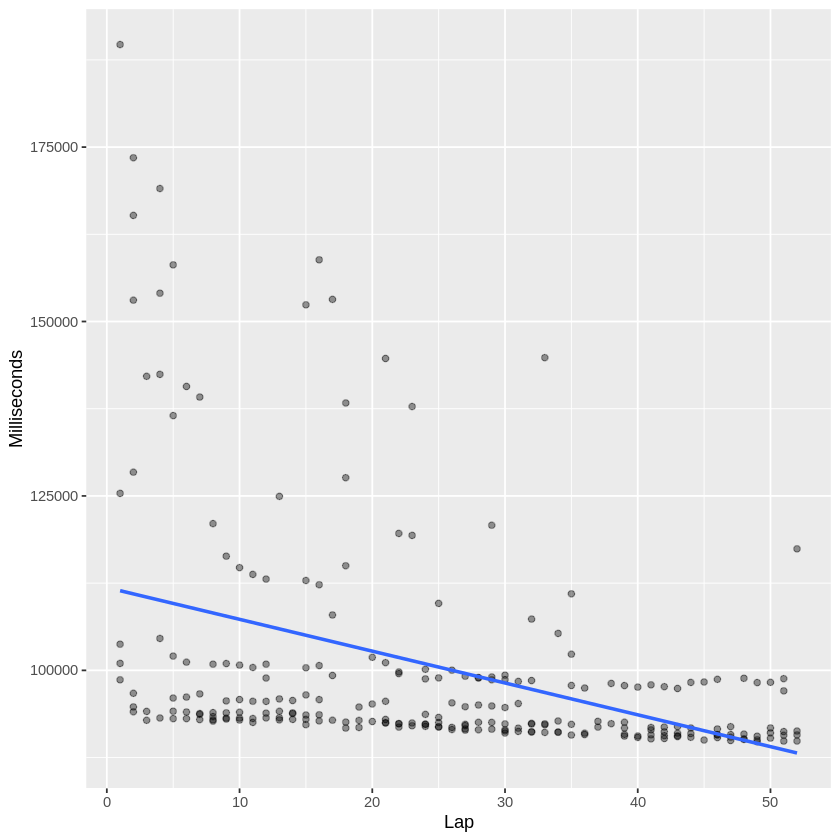

In [13]:
#10. Great Britain

cs_uk <- sai_laps %>%
                filter(raceId %in% uk_race_ID) 

cs_uk_clean <- cs_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_uk_clean_ID <- cs_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_uk_races <- sai_laps %>%
                    filter(raceId %in% cs_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5184666,86.41109,1.440185


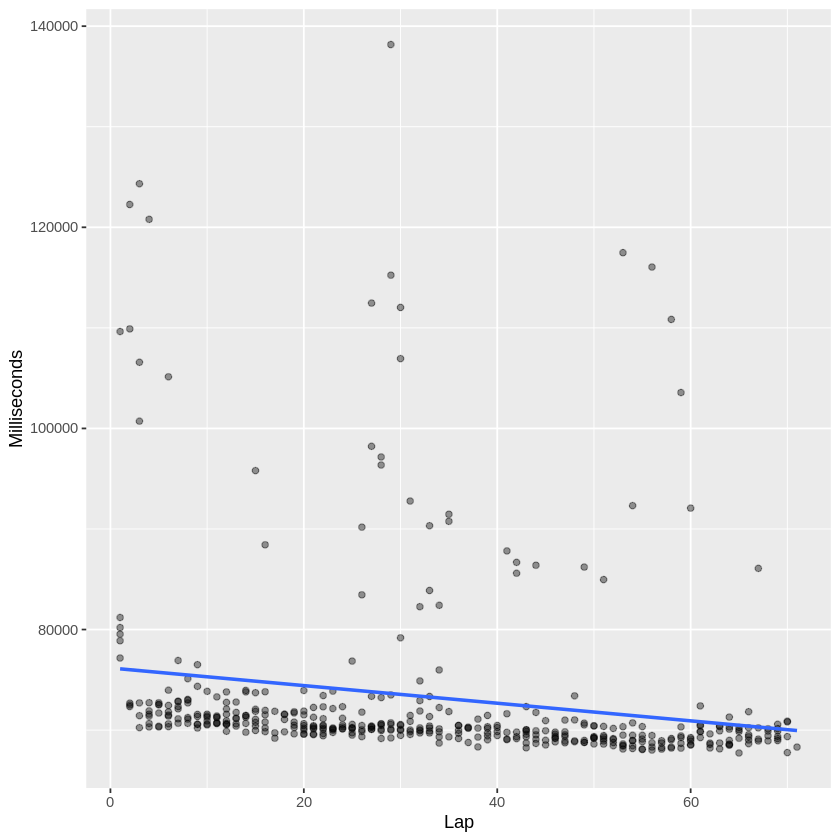

In [14]:
#11. Austria

cs_austria <- sai_laps %>%
                filter(raceId %in% austria_race_ID) 

cs_austria_clean <- cs_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_austria_clean_ID <- cs_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_austria_races <- sai_laps %>%
                    filter(raceId %in% cs_austria_clean_ID)

formulaone_split <- initial_split(cs_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

In [15]:
#12. France

# cs_france <- sai_laps %>%
#                 filter(raceId %in% france_race_ID) 

# cs_france_clean <- cs_france %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# cs_france_clean
# cs_france_clean_ID <- cs_france_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# cs_france_races <- sai_laps %>%
#                     filter(raceId %in% cs_france_clean_ID)

# formulaone_split <- initial_split(cs_france_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6046364,100.7727,1.679546


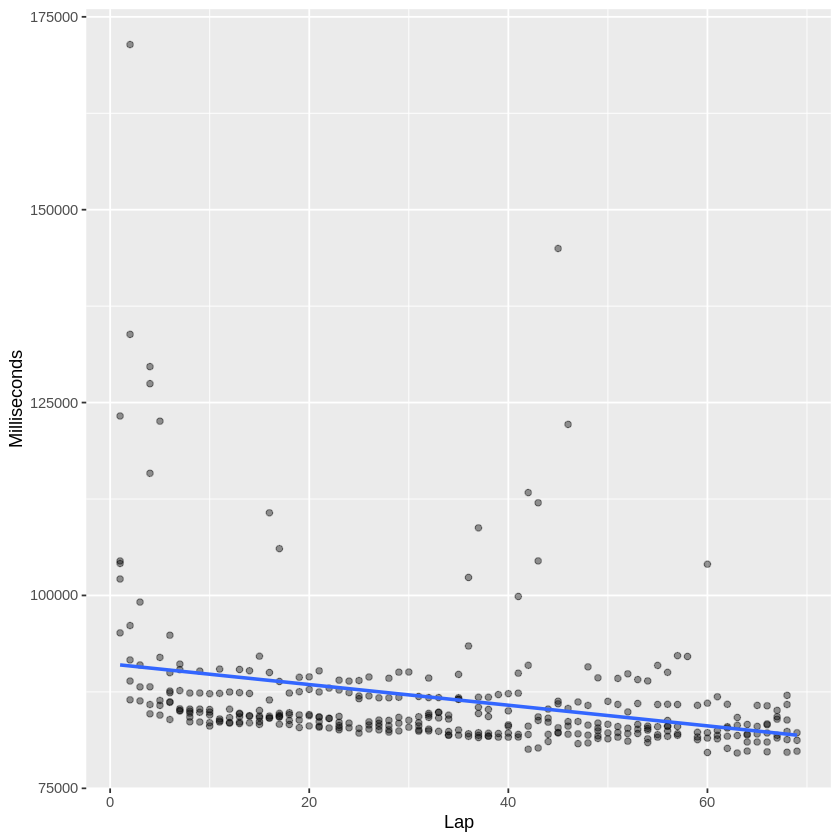

In [16]:
#13. Hungary

cs_hungary <- sai_laps %>%
                filter(raceId %in% hungary_race_ID) 

cs_hungary_clean <- cs_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

cs_hungary_clean_ID <- cs_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_hungary_races <- sai_laps %>%
                    filter(raceId %in% cs_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
980,44
1001,43
937,32
960,1
1022,1
1063,1


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5198557,86.64262,1.444044


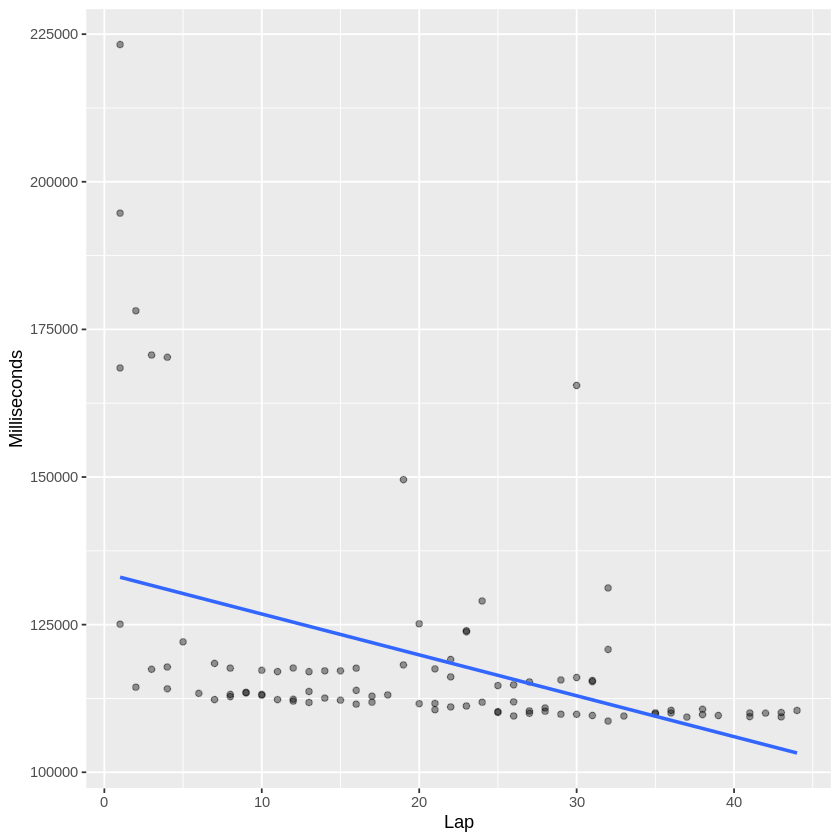

In [17]:
#14. Belgium

cs_belgium <- sai_laps %>%
                filter(raceId %in% belgium_race_ID) 

cs_belgium_clean <- cs_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_belgium_clean
cs_belgium_clean_ID <- cs_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_belgium_races <- sai_laps %>%
                    filter(raceId %in% cs_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5513087,91.88478,1.531413


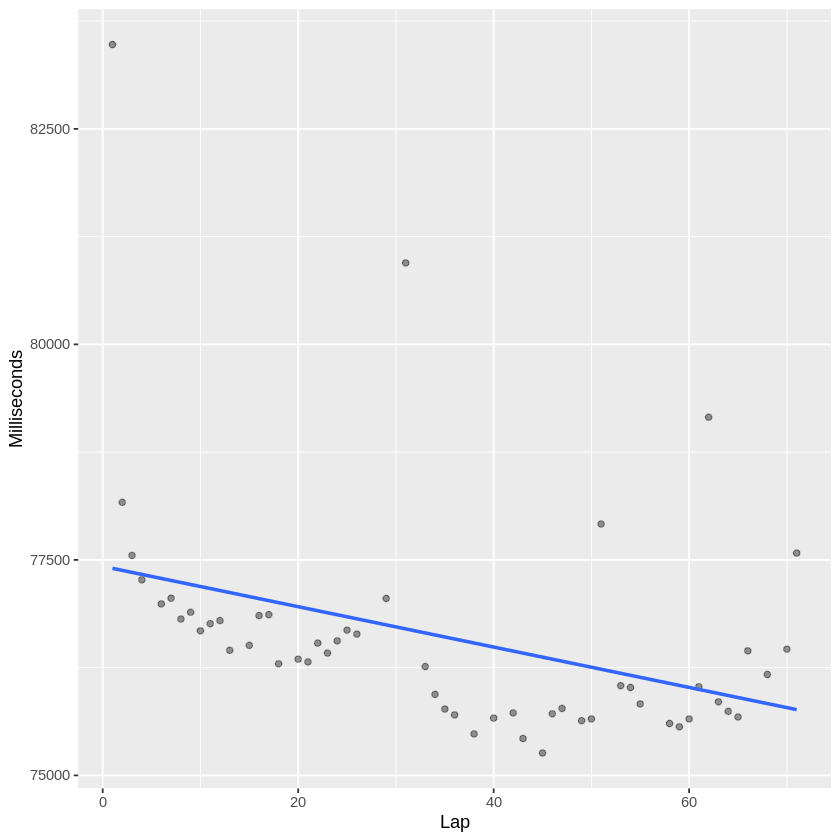

In [18]:
#15. Netherlands

cs_netherlands <- sai_laps %>%
                filter(raceId %in% netherlands_race_ID) 

cs_netherlands_clean <- cs_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_netherlands_clean
cs_netherlands_clean_ID <- cs_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_netherlands_races <- sai_laps %>%
                    filter(raceId %in% cs_netherlands_clean_ID)

formulaone_split <- initial_split(cs_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5101220,85.02033,1.417005


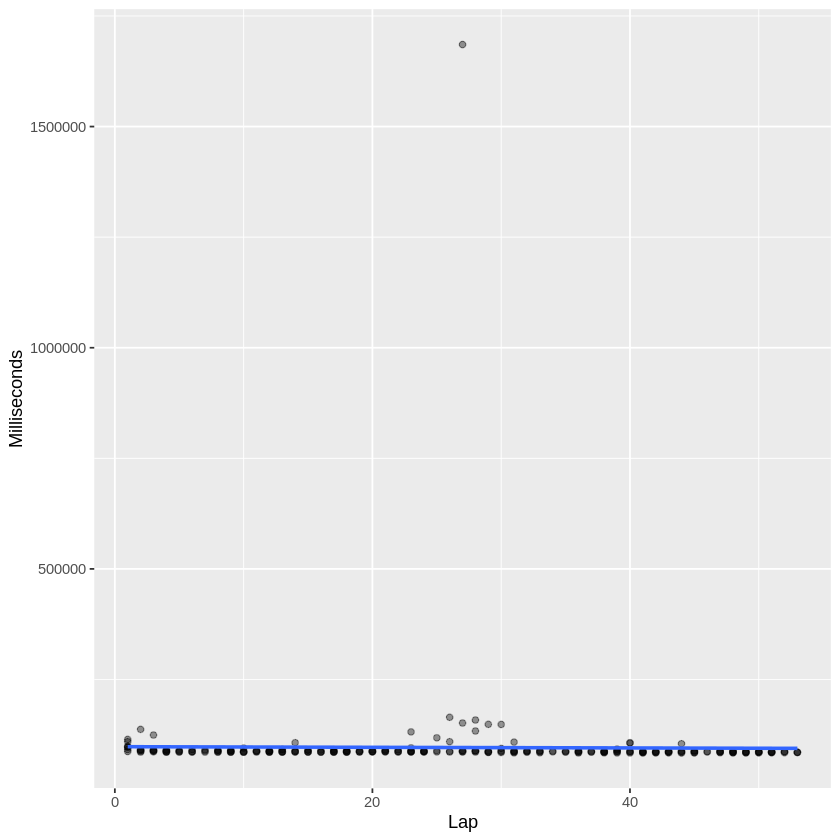

In [19]:
#16. Italy, Monza

cs_monza <- sai_laps %>%
                filter(raceId %in% monza_race_ID) 

cs_monza_clean <- cs_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

cs_monza_clean_ID <- cs_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_monza_races <- sai_laps %>%
                    filter(raceId %in% cs_monza_clean_ID)

formulaone_split <- initial_split(cs_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7214252,120.2375,2.003959


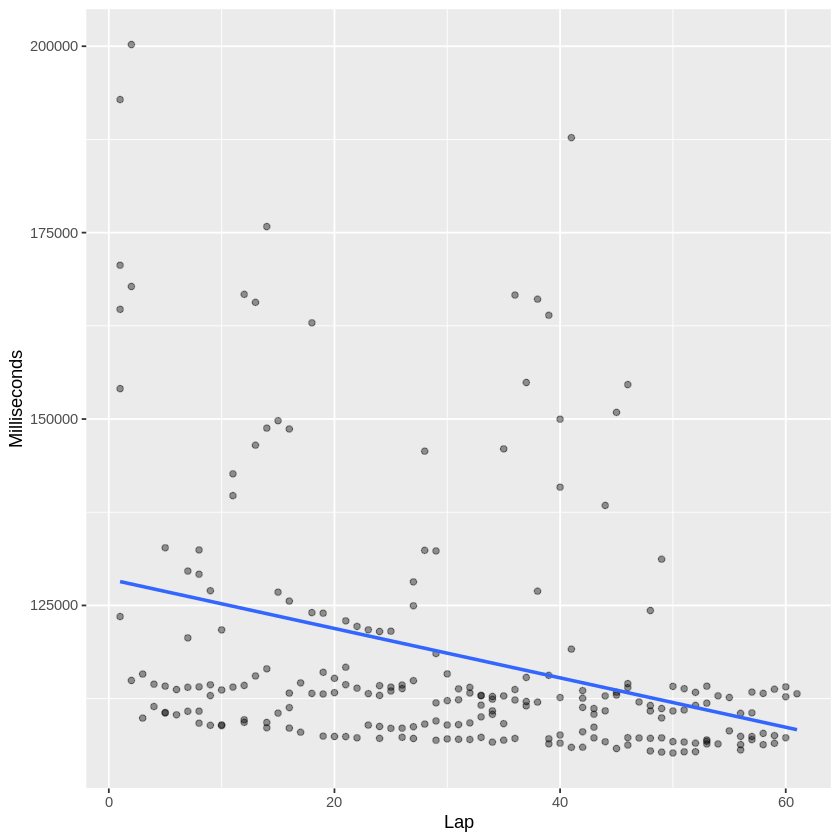

In [20]:
#17. Singapore

cs_singapore <- sai_laps %>%
                filter(raceId %in% singapore_race_ID) 

cs_singapore_clean <- cs_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_singapore_clean_ID <- cs_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_singapore_races <- sai_laps %>%
                    filter(raceId %in% cs_singapore_clean_ID)

formulaone_split <- initial_split(cs_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5296198,88.26996,1.471166


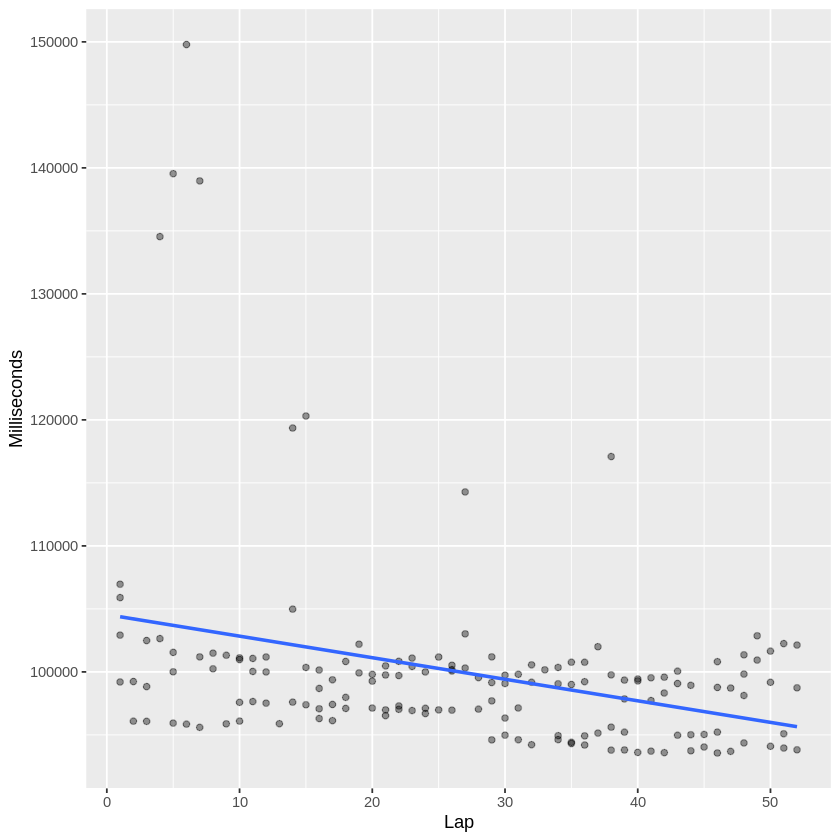

In [21]:
#18. Japan

cs_japan <- sai_laps %>%
                filter(raceId %in% japan_race_ID) 

cs_japan_clean <- cs_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_japan_clean_ID <- cs_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_japan_races <- sai_laps %>%
                    filter(raceId %in% cs_japan_clean_ID)

formulaone_split <- initial_split(cs_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5948465,99.14108,1.652351


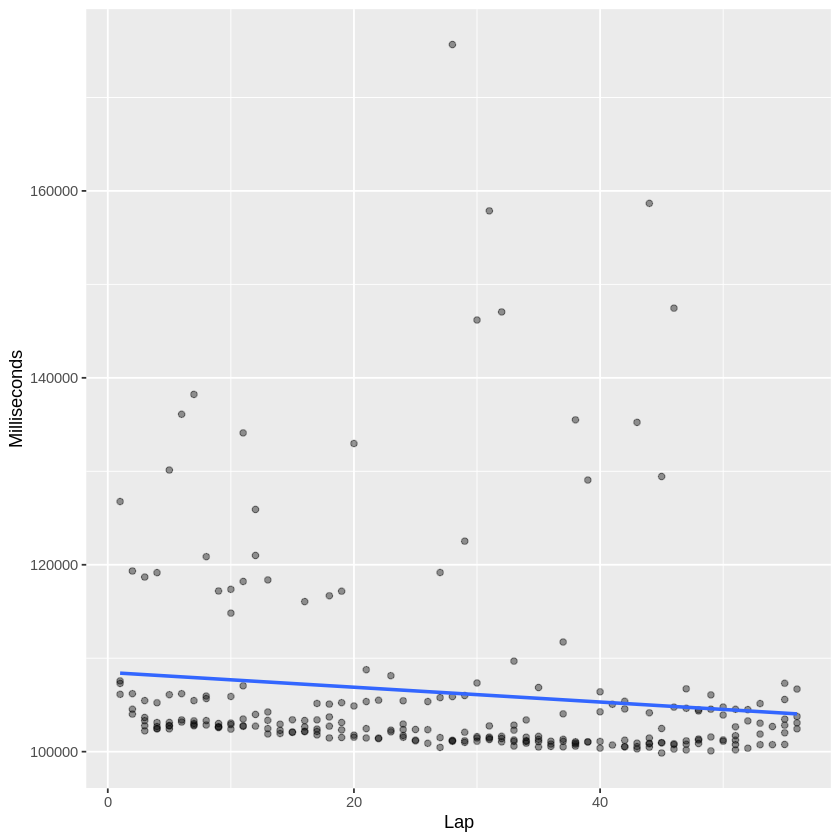

In [22]:
#19. USA, Austin

cs_austin <- sai_laps %>%
                filter(raceId %in% austin_race_ID) 

cs_austin_clean <- cs_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_austin_clean_ID <- cs_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_austin_races <- sai_laps %>%
                    filter(raceId %in% cs_austin_clean_ID)

formulaone_split <- initial_split(cs_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6059681,100.9947,1.683245


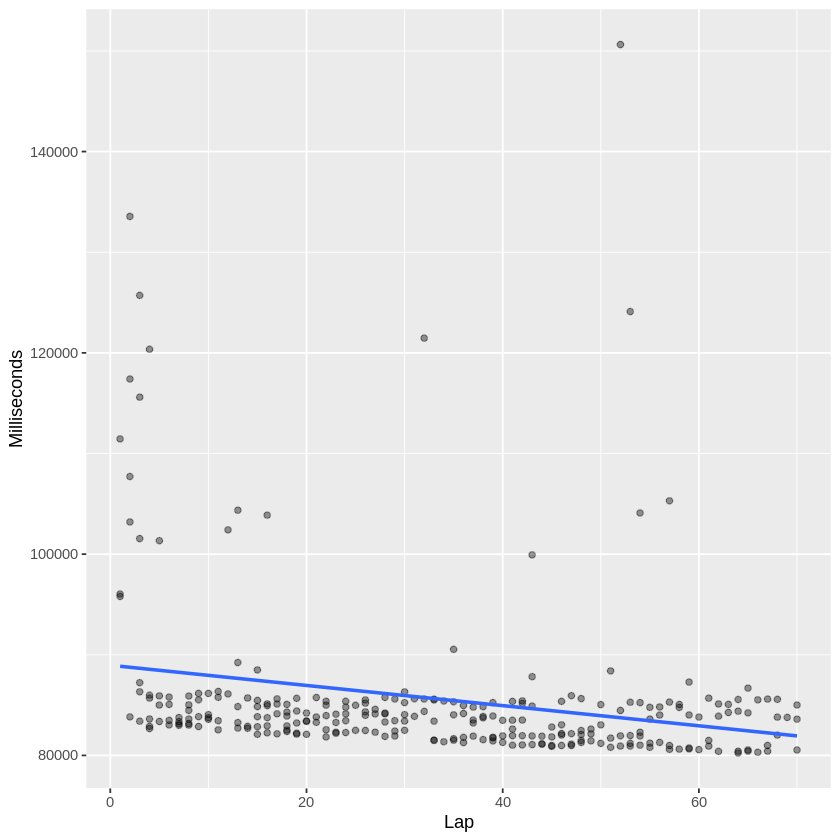

In [23]:
#20. Mexico

cs_mexico <- sai_laps %>%
                filter(raceId %in% mexico_race_ID) 

cs_mexico_clean <- cs_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_mexico_clean_ID <- cs_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_mexico_races <- sai_laps %>%
                    filter(raceId %in% cs_mexico_clean_ID)

formulaone_split <- initial_split(cs_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5877701,97.96168,1.632695


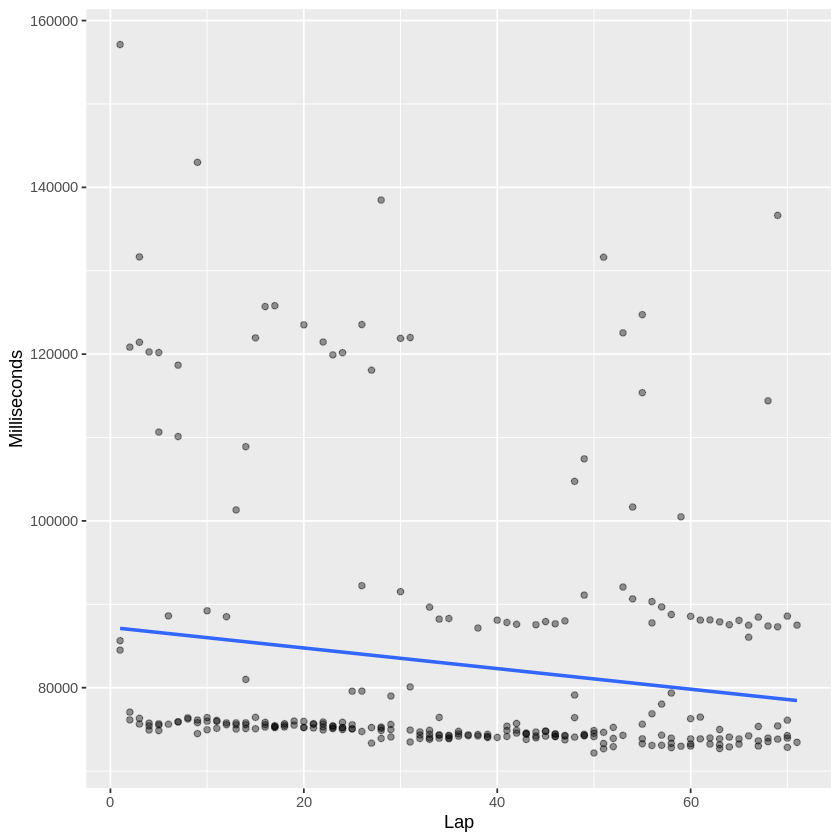

In [24]:
#21. Brazil

cs_brazil <- sai_laps %>%
                filter(raceId %in% brazil_race_ID) 

cs_brazil_clean <- cs_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_brazil_clean_ID <- cs_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_brazil_races <- sai_laps %>%
                    filter(raceId %in% cs_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(cs_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1073,58
945,55
1009,55
1047,55
1030,54
968,41
988,31


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6084933,101.4155,1.690259


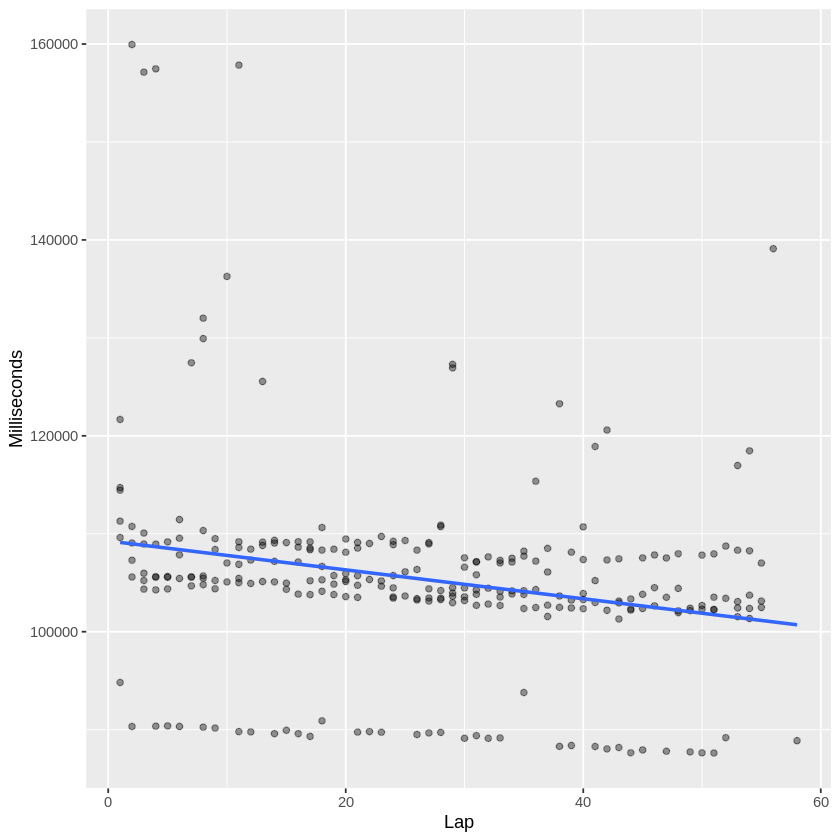

In [25]:
#22. Abu Dhabi

cs_uae <- sai_laps %>%
                filter(raceId %in% uae_race_ID) 

cs_uae_clean <- cs_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_uae_clean
cs_uae_clean_ID <- cs_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_uae_races <- sai_laps %>%
                    filter(raceId %in% cs_uae_clean_ID)

formulaone_split <- initial_split(cs_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()